In [ ]:
import cv2

In [ ]:
# Load the image
img = cv2.imread('gun_sample.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load Haar cascade for gun detection (download gun-cascade.xml)
gun_cascade = cv2.CascadeClassifier('/content/cascade.xml')

# Detect guns
guns = gun_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in guns:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

cv2.imshow('Gun Detection', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:


# Load Haar cascade
gun_cascade = cv2.CascadeClassifier('gun-cascade.xml')

# Load and convert image
img = cv2.imread('your_image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect guns
guns = gun_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in guns:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display
cv2.imshow('Detected Guns', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()
image_path = next(iter(uploaded))  # gets the uploaded file name

# Read image
img = cv2.imread(image_path)

# Check if image is loaded
if img is None:
    print("❌ Error: Image not loaded. Please check the filename or format.")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load gun cascade (assuming it's already downloaded as 'gun-cascade.xml')
    gun_cascade = cv2.CascadeClassifier('gun-cascade.xml')
    guns = gun_cascade.detectMultiScale(gray, 1.3, 5)

    # Draw detections
    for (x, y, w, h) in guns:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display result
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Detected Guns: {len(guns)}")
    plt.show()


Saving cascade.xml to cascade (1).xml
❌ Error: Image not loaded. Please check the filename or format.


In [ ]:
# ✅ Step 1: Upload your test image
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()  # Upload a .jpg or .png image of a gun
image_path = next(iter(uploaded))  # Get the uploaded image filename


Saving cascade.xml to cascade (2).xml


In [ ]:
# ✅ Step 2: Load the cascade from the correct path
cascade_path = "/content/cascade.xml"  # Your uploaded gun cascade

# Load the Haar Cascade
gun_cascade = cv2.CascadeClassifier(cascade_path)


In [ ]:
# ✅ Step 3: Read the image
img = cv2.imread(image_path)

if img is None:
    print("❌ Error: Image not loaded. Please re-check the uploaded file format.")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect guns
    guns = gun_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    print(f"✅ Guns Detected: {len(guns)}")

    # Draw bounding boxes
    for (x, y, w, h) in guns:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display output image
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Guns Detected: {len(guns)}")
    plt.show()


❌ Error: Image not loaded. Please re-check the uploaded file format.


In [ ]:
import cv2

# --- IMPORTANT ---
# Make sure the 'cascade.xml' file is in the same folder as your script,
# or provide the full path to the file.
cascade_path = '/content/cascade.xml'

# --- IMPORTANT ---
# Make sure the 'cascade.xml' file is in the same folder as your script,
# or provide the full path to the file.
cascade_path = 'cascade.xml'

# Load the trained cascade classifier
gun_cascade = cv2.CascadeClassifier(cascade_path)

# Check if the cascade file has been loaded correctly
if gun_cascade.empty():
    print("Error loading cascade file. Make sure 'cascade.xml' is in the correct path.")
    exit()

# Initialize video capture (0 for webcam, or provide a path to a video file)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect guns in the image
    # You might need to adjust scaleFactor and minNeighbors for your use case.
    # A lower scaleFactor (e.g., 1.1) is more thorough but slower.
    # A higher minNeighbors (e.g., 10) results in fewer detections but with higher confidence.
    guns = gun_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(50, 50))

    # Draw a rectangle around the detected guns
    for (x, y, w, h) in guns:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(frame, 'Gun Detected', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    cv2.imshow('Gun Detection', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Load the trained cascade classifier
gun_cascade = cv2.CascadeClassifier(cascade_path)

# Check if the cascade file has been loaded correctly
if gun_cascade.empty():
    print("Error loading cascade file. Make sure 'cascade.xml' is in the correct path.")
    exit()

# Initialize video capture (0 for webcam, or provide a path to a video file)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect guns in the image
    # You might need to adjust scaleFactor and minNeighbors for your use case.
    # A lower scaleFactor (e.g., 1.1) is more thorough but slower.
    # A higher minNeighbors (e.g., 10) results in fewer detections but with higher confidence.
    guns = gun_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(50, 50))

    # Draw a rectangle around the detected guns
    for (x, y, w, h) in guns:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(frame, 'Gun Detected', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    cv2.imshow('Gun Detection', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import os # For checking if the file exists

# --- Define the path to your uploaded cascade file ---
# Assuming you uploaded 'cascade.xml' to the root of your working directory (e.g., in Colab's /content/)
# If it's in a subfolder, adjust this path accordingly.
cascade_file_name = 'cascade.xml'

# --- IMPORTANT: Verify the cascade file path ---
# In Colab, uploaded files usually go to /content/
# If you uploaded it to a specific folder, adjust this.
# Example if uploaded to /content/my_cascades/
cascade_path = '/content/my_cascades/cascade.xml'

# Let's assume it's in the current working directory or /content/ for simplicity
# You might need to adjust this depending on how you uploaded it and where your script runs.
# Check if it's in the current directory first, otherwise assume /content/
if os.path.exists(cascade_file_name):
    cascade_path = cascade_file_name
elif os.path.exists(f'/content/{cascade_file_name}'):
    cascade_path = f'/content/{cascade_file_name}'
else:
    print(f"Error: Cascade file '{cascade_file_name}' not found.")
    print("Please make sure it's uploaded and its path is correct.")
    # Exit or handle the error appropriately
    exit()

# Load the trained cascade classifier
gun_cascade = cv2.CascadeClassifier(cascade_path)

# Check if the cascade file has been loaded correctly
if gun_cascade.empty():
    print(f"Error: Failed to load cascade classifier from '{cascade_path}'.")
    print("This might mean the XML file is corrupted, empty, or not a valid cascade.")
    exit()
else:
    print(f"Successfully loaded cascade classifier from '{cascade_path}'.")

# --- Now, define your input image or video file ---
# You would also need to upload these files if they are not already in your environment.

# EXAMPLE 1: For an IMAGE file
image_file_path = '/content/shutterstock_102492452_1.jpg' # Assuming you uploaded this image

# To use this:
# 1. Upload a sample image (e.g., 'sample_gun_image.jpg') to your environment.
# 2. Uncomment the lines below for image processing.
# 3. Comment out the video processing section if you only want to process the image.

if not os.path.exists(image_file_path):
    print(f"Error: Image file '{image_file_path}' not found.")
    print("Please upload the image or provide the correct path.")
else:
    frame = cv2.imread(image_file_path)
    if frame is None:
        print(f"Error: Could not read image from '{image_file_path}'.")
    else:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        guns = gun_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=8, minSize=(80, 80))

        for (x, y, w, h) in guns:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(frame, 'Gun Detected', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        cv2.imshow('Gun Detection - Image', frame)
        cv2.waitKey(0) # Wait indefinitely until a key is pressed
        cv2.destroyAllWindows()


# EXAMPLE 2: For a VIDEO file
# video_file_path = '/content/sample_gun_video.mp4' # Assuming you uploaded this video

# To use this:
# 1. Upload a sample video (e.g., 'sample_gun_video.mp4') to your environment.
# 2. Uncomment the lines below for video processing.
# 3. Comment out the image processing section if you only want to process the video.

# video_file_path = '/content/sample_gun_video.mp4' # Replace with your uploaded video path

# if not os.path.exists(video_file_path):
#     print(f"Error: Video file '{video_file_path}' not found.")
#     print("Please upload the video or provide the correct path.")
# else:
#     cap = cv2.VideoCapture(video_file_path)

#     if not cap.isOpened():
#         print(f"Error: Could not open video file '{video_file_path}'.")
#     else:
#         print(f"Processing video: {video_file_path}")
#         while True:
#             ret, frame = cap.read()
#             if not ret:
#                 print("End of video stream or failed to read frame.")
#                 break

#             # Convert frame to grayscale
#             gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#             # Detect guns
#             guns = gun_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=8, minSize=(80, 80))

#             for (x, y, w, h) in guns:
#                 cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
#                 cv2.putText(frame, 'Gun Detected', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

#             cv2.imshow('Gun Detection - Video', frame)

#             if cv2.waitKey(1) & 0xFF == ord('q'): # Press 'q' to quit video playback
#                 break

#         cap.release()
#         cv2.destroyAllWindows()

print("Gun detection process complete.")

Successfully loaded cascade classifier from 'cascade.xml'.
Error: Image file '/content/shutterstock_102492452_1.jpg' not found.
Please upload the image or provide the correct path.
Gun detection process complete.


Successfully loaded cascade classifier from 'cascade.xml'.
Gun(s) detected in image '/content/WhatsApp Image 2025-04-28 at 21.44.55_665d062b555.jpg'


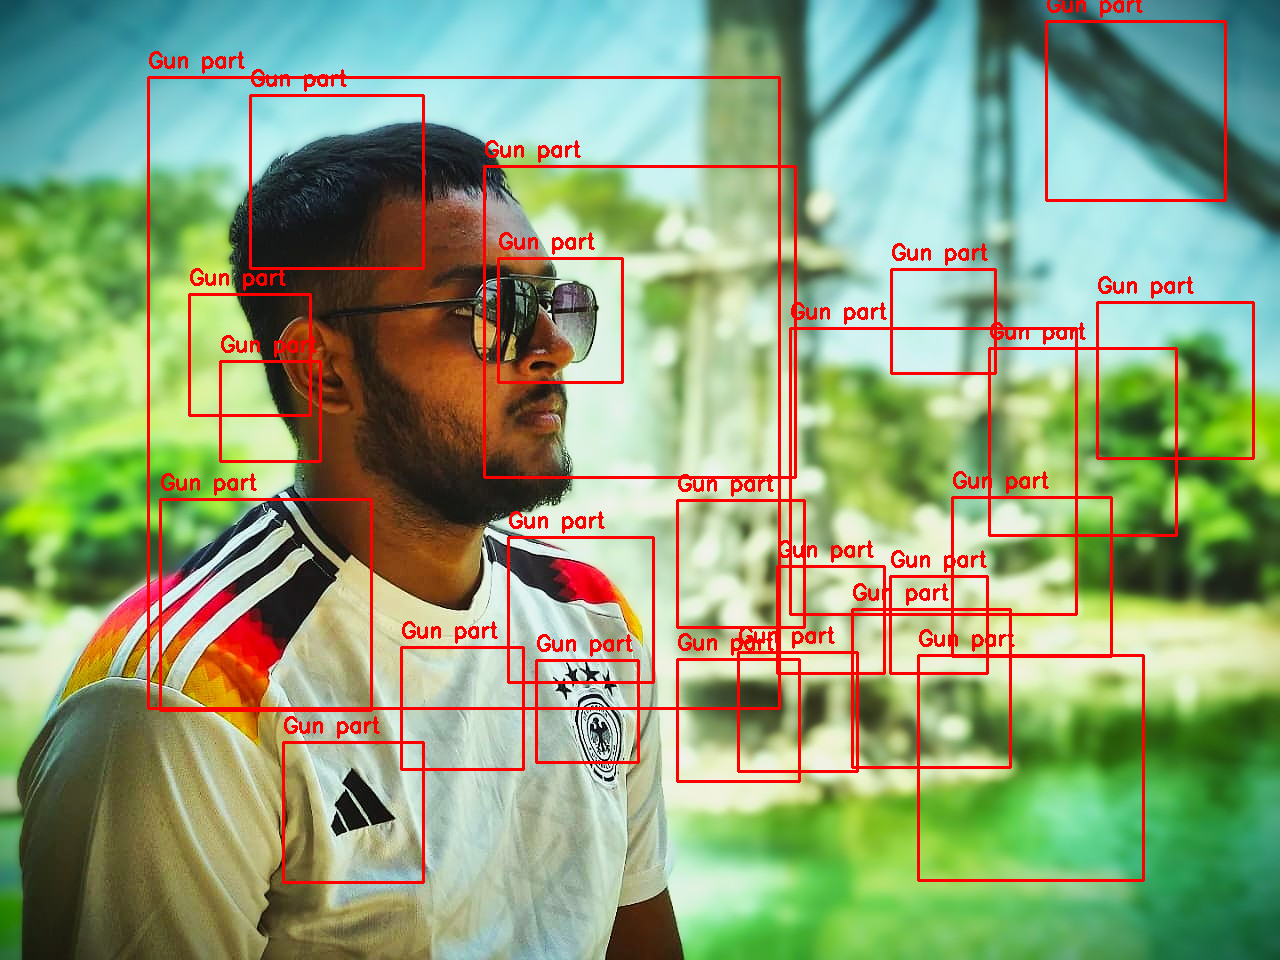

Image displayed above. No need to press a key, output is static.

Image processing complete.


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow # <--- IMPORTANT: This line is new!

# --- Define the path to your uploaded cascade file ---
# Assuming you uploaded 'cascade.xml' to the root of your working directory (e.g., in Colab's /content/)
cascade_file_name = 'cascade.xml'

# Check if it's in the current directory or /content/
if os.path.exists(cascade_file_name):
    cascade_path = cascade_file_name
elif os.path.exists(f'/content/{cascade_file_name}'):
    cascade_path = f'/content/{cascade_file_name}'
else:
    print(f"Error: Cascade file '{cascade_file_name}' not found.")
    print("Please make sure it's uploaded and its path is correct.")
    exit()

# Load the trained cascade classifier
gun_cascade = cv2.CascadeClassifier(cascade_path)

# Check if the cascade file has been loaded correctly
if gun_cascade.empty():
    print(f"Error: Failed to load cascade classifier from '{cascade_path}'.")
    print("This might mean the XML file is corrupted, empty, or not a valid cascade.")
    exit()
else:
    print(f"Successfully loaded cascade classifier from '{cascade_path}'.")

# --- Now, define your input image file ---
# Make sure you have uploaded 'sample_gun_image.jpg' (or your image file) to Colab
image_file_path = '/content/WhatsApp Image 2025-04-28 at 21.44.55_665d062b555.jpg' # Replace with your uploaded image path

if not os.path.exists(image_file_path):
    print(f"Error: Image file '{image_file_path}' not found.")
    print("Please upload the image or provide the correct path.")
else:
    frame = cv2.imread(image_file_path)
    if frame is None:
        print(f"Error: Could not read image from '{image_file_path}'.")
    else:
        # It's good practice to resize the image for consistent display and processing
        # if the original image is very large.
        # frame = cv2.resize(frame, (800, int(frame.shape[0] * 800 / frame.shape[1]))) # Example resize

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        guns = gun_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=8, minSize=(80, 80))

        if len(guns) > 0:
            for (x, y, w, h) in guns:
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
                cv2.putText(frame, 'Gun part', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            print(f"Gun(s) detected in image '{image_file_path}'")
        else:
            cv2.putText(frame, 'No Gun Detected', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            print(f"No guns detected in image '{image_file_path}'")

        # --- IMPORTANT CHANGE FOR COLAB ---
        # Use cv2_imshow instead of cv2.imshow
        cv2_imshow(frame) # This will display the image directly in the Colab output cell
        print("Image displayed above. No need to press a key, output is static.")

        # In Colab, cv2.waitKey(0) and cv2.destroyAllWindows() are not typically used
        # after cv2_imshow for static image display, as the output is embedded.
        # However, they won't cause issues if left in.
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

print("\nImage processing complete.")